Please download diabetes.csv on https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download and put the file on ../data

In [1]:
import pandas as pd

### Load the dataset and put it on a Pandas dataframe

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.loc[:, df.columns != 'Outcome'].to_numpy()

In [5]:
Y = df['Outcome'].to_numpy()

In [6]:
df['Pregnancies'].mean()

3.8450520833333335

### Let's visualize analyze how each feature (column) differs from each class

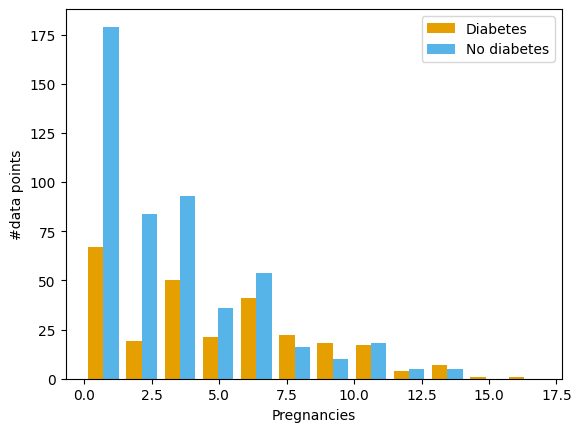

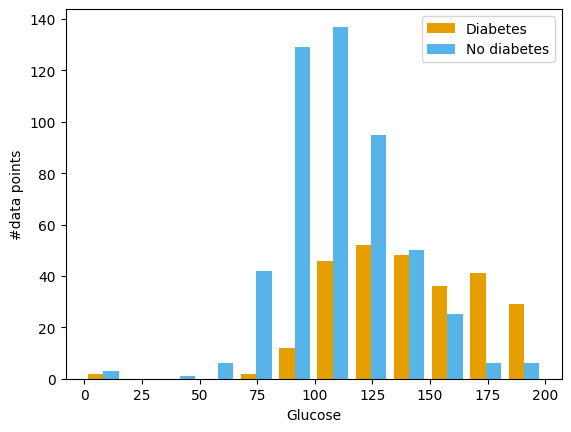

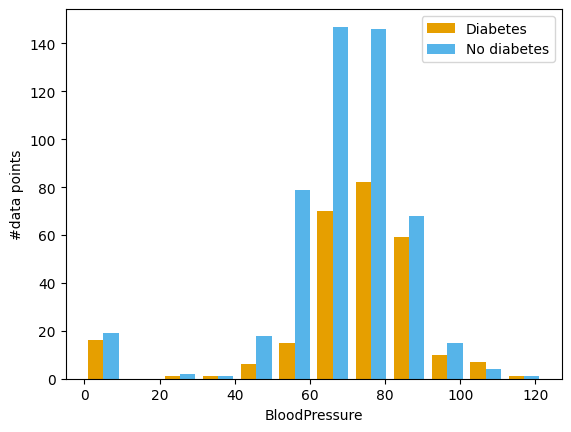

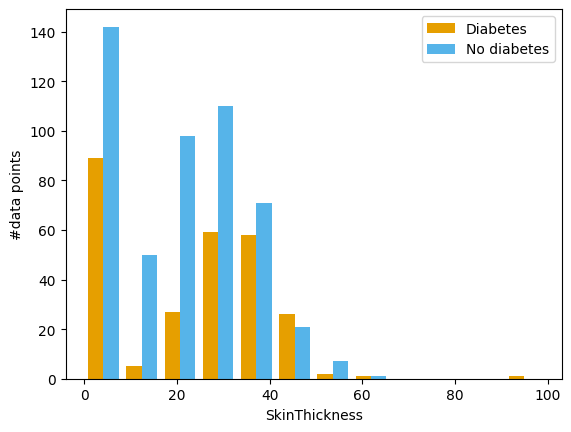

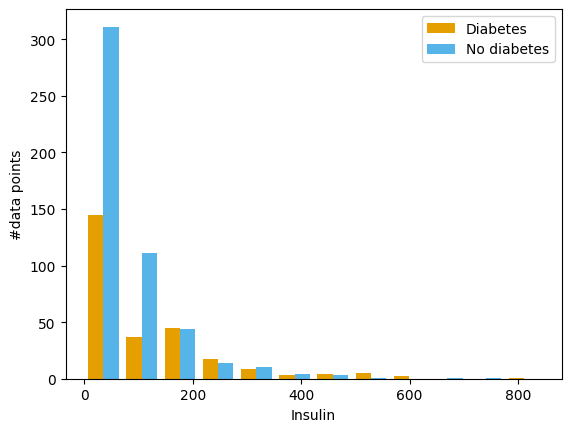

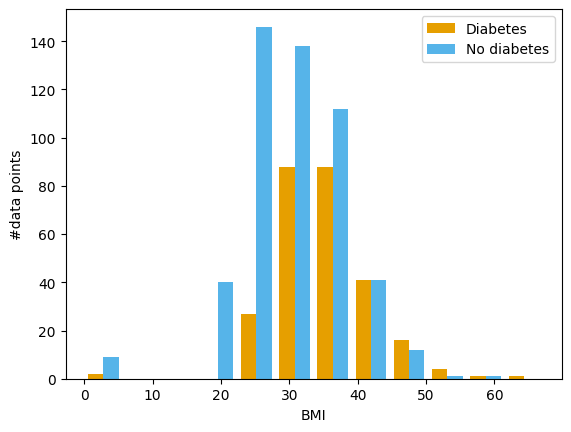

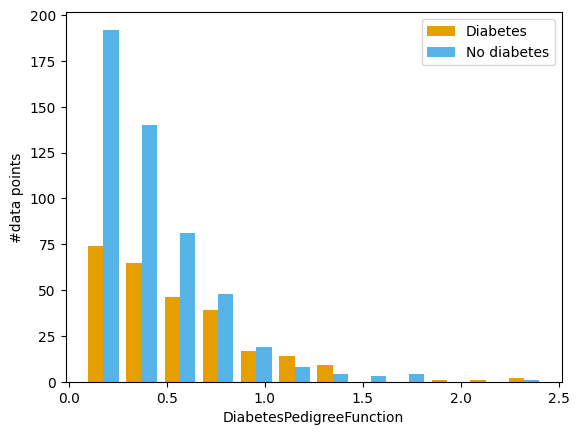

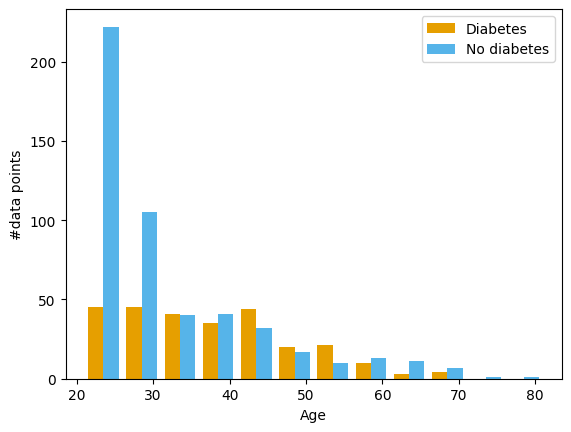

In [7]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'Outcome':

        # Make a separate list for each class
        x1 = list(df[df['Outcome'] == 1][column])
        x2 = list(df[df['Outcome'] == 0][column])

        # Assign colors for each class and the names
        colors = ['#E69F00', '#56B4E9']
        names = ['Diabetes', 'No diabetes']

        # Make the histogram using a list of lists
        plt.hist([x1, x2], bins = int(180/15),
                 color = colors, label=names)

        # Plot formatting
        plt.legend()
        plt.xlabel(column)
        plt.ylabel('#data points')
        plt.show()
        #plt.title('Side-by-Side Histogram with Multiple Airlines')

### Let's visualize all features together

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


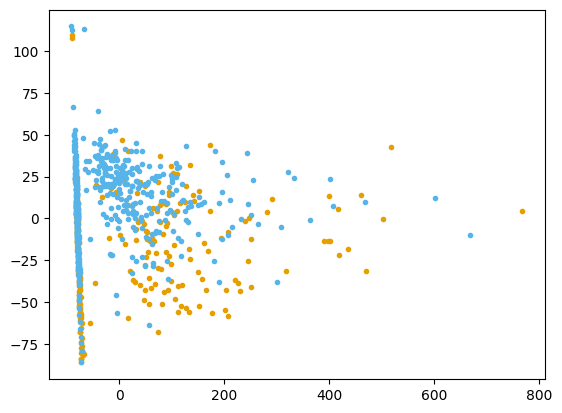

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

X_pca1 = pca.transform( df[df['Outcome'] == 1].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca1[:,0], X_pca1[:,1], color=colors[0], label=names[0], marker='.')

X_pca2 = pca.transform( df[df['Outcome'] == 0].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca2[:,0], X_pca2[:,1], color=colors[1], label=names[1], marker='.')


plt.show()

In [9]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [11]:
scaler.transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


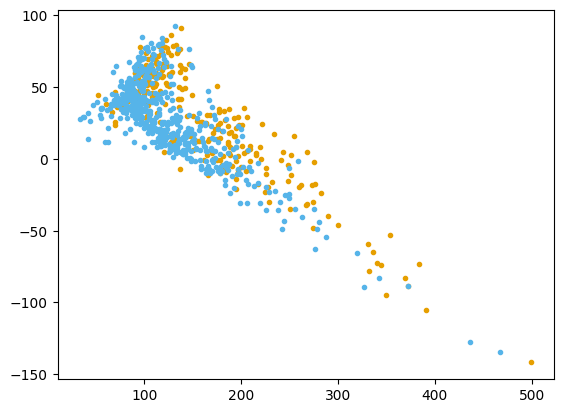

In [12]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_transformed)

X_pca1 = pca.transform( df[df['Outcome'] == 1].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca1[:,0], X_pca1[:,1], color=colors[0], label=names[0], marker='.')

X_pca2 = pca.transform( df[df['Outcome'] == 0].loc[:, df.columns != 'Outcome'] )
plt.scatter( X_pca2[:,0], X_pca2[:,1], color=colors[1], label=names[1], marker='.')


plt.show()

### Split data set into train and test sets

In [27]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42)

## Test classifiers

In [28]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [29]:
X_test[-2]

array([ 1.23388019,  0.69183807, -0.16054575, -1.28821221, -0.69289057,
        0.36900779, -1.03552712,  0.66020563])

In [30]:
Y_test[-2]

1

In [31]:
clf.predict([X_test[-1]])

array([0])

In [32]:
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

#### Compute accuracy

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.7480314960629921

In [20]:
len(Y_test)

254

In [21]:
len([ y for y in Y_test if y == 0])

168

In [22]:
len([ y for y in Y_test if y == 1])

86

In [23]:
len([ y for y in Y_test if y == 0])/len(Y_test)

0.6614173228346457

In [24]:
from sklearn.metrics import f1_score, precision_score

print(f'F1 {f1_score(Y_test, y_pred)}')
print(f'Precision {precision_score(Y_test, y_pred)}')

F1 0.627906976744186
Precision 0.627906976744186


In [25]:
clf.predict_proba(X_test)[:, 1]

array([0.26763107, 0.19542717, 0.1253823 , 0.1430312 , 0.50585933,
       0.45506262, 0.01391593, 0.59692508, 0.56932121, 0.80232733,
       0.23843431, 0.90940639, 0.40034034, 0.26531011, 0.06648664,
       0.34662644, 0.13237694, 0.0695184 , 0.86534022, 0.60011956,
       0.2196597 , 0.07795182, 0.48698224, 0.09701001, 0.5502952 ,
       0.89229861, 0.11363014, 0.03223136, 0.28765758, 0.11221908,
       0.91476356, 0.88094006, 0.81677272, 0.8155347 , 0.62248111,
       0.66957793, 0.9604448 , 0.22267221, 0.4894079 , 0.73506754,
       0.06428187, 0.57949727, 0.5567197 , 0.30371445, 0.02896954,
       0.51901658, 0.57671126, 0.20935562, 0.31858021, 0.96125218,
       0.04652794, 0.65113183, 0.82448118, 0.25472485, 0.11359443,
       0.03853322, 0.80042056, 0.00425375, 0.38932475, 0.78878731,
       0.73076732, 0.35501141, 0.22516849, 0.18419318, 0.08607341,
       0.63713358, 0.04641191, 0.78799542, 0.03607925, 0.78758531,
       0.68989561, 0.0680209 , 0.17200035, 0.12478181, 0.09054

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])

0.7978959025470652